# numpy基础

### 七月在线python数据分析集训营 julyedu.com

褚则伟 zeweichu@gmail.com

## 目录
- 文件输入输出
- 线性代数运算
- 随堂小项目：用Numpy写一个Softmax

## numpy的文件输入输出
### 七月在线python数据分析集训营 julyedu.com

读取csv文件作为数组

In [2]:
import numpy as np
arr = np.loadtxt('array_ex.txt', delimiter=',')
print(arr)

[[ 0.580052  0.18673   1.040717  1.134411]
 [ 0.194163 -0.636917 -0.938659  0.124094]
 [-0.12641   0.268607 -0.695724  0.047428]
 [-1.484413  0.004176 -0.744203  0.005487]
 [ 2.302869  0.200131  1.670238 -1.88109 ]
 [-0.19323   1.047233  0.482803  0.960334]]


还有一个常用的把文本数据转换成ndarray的方法叫做genfromtxt

In [4]:

arr = np.genfromtxt(BytesIO(open('array_ex.txt')), delimiter=",")
print(arr)

NameError: name 'BytesIO' is not defined

数组文件读写

In [14]:
arr = np.arange(10)
np.save('some_array', arr)

In [16]:
print(np.load('some_array.npy'))

[0 1 2 3 4 5 6 7 8 9]


多个数组可以一起压缩存储

In [17]:
arr2 = np.arange(15).reshape(3,5)
np.savez('array_archive.npz', a=arr, b=arr2)

In [18]:
arch = np.load('array_archive.npz')
print(arch['a'])
print(arch['b'])

[0 1 2 3 4 5 6 7 8 9]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


## numpy和scipy的相关数学运算
### 七月在线python数据分析集训营 julyedu.com

In [5]:
import numpy as np

那如果我要做矩阵的乘法运算怎么办！！！恩，别着急，照着下面写就可以了:

[matrix multiplication](http://mathworld.wolfram.com/MatrixMultiplication.html)

In [15]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
v = np.array([9,10])
w = np.array([11, 12])
print(x)
print(y)

[[ 1.  2.]
 [ 3.  4.]]
[[ 5.  6.]
 [ 7.  8.]]


求向量内积

In [12]:
print(v.dot(w))
print(np.dot(v, w))

219
219


矩阵的乘法

In [13]:
print(x.dot(v))
print(np.dot(x, v))

[ 29.  67.]
[ 29.  67.]


In [14]:
print(x.dot(y))
print(np.dot(x, y))

[[ 19.  22.]
 [ 43.  50.]]
[[ 19.  22.]
 [ 43.  50.]]


向量的内积[inner](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.inner.html#numpy.inner)

In [16]:
np.inner(x, y)

array([[ 17.,  23.],
       [ 39.,  53.]])

In [22]:
X = np.arange(24).reshape(2,3,4)
Y = np.arange(12).reshape(3,4)
np.inner(X, Y)

array([[[ 14,  38,  62],
        [ 38, 126, 214],
        [ 62, 214, 366]],

       [[ 86, 302, 518],
        [110, 390, 670],
        [134, 478, 822]]])

In [35]:
X = np.arange(24).reshape(2,3,4)
Y = np.arange(16).reshape(4,4)
np.inner(X, Y).shape

(2, 3, 4)

转置和数学公式一样，简单粗暴

In [24]:
print(x)
print(x.T)

[[ 1.  2.]
 [ 3.  4.]]
[[ 1.  3.]
 [ 2.  4.]]


In [ ]:
需要说明一下，1维的vector转置还是自己

In [25]:
v = np.array([1,2,3])
print(v)
print(v.T)

[1 2 3]
[1 2 3]


2维的就不一样了

In [26]:
w = np.array([[1,2,3]])
print(w)
print(w.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


利用转置矩阵做dot product

In [27]:
arr = np.random.randn(6,3)
print(np.dot(arr.T, arr))

[[ 1.52312209 -1.04334087  1.12345523]
 [-1.04334087  9.52204152  0.05061461]
 [ 1.12345523  0.05061461  4.80288518]]


In [28]:
print(np.dot(arr, arr))

ValueError: shapes (6,3) and (6,3) not aligned: 3 (dim 1) != 6 (dim 0)

高维的tensor也可以做转置

In [19]:
arr = np.arange(16).reshape((2, 2, 4))
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


In [20]:
print(arr.transpose((1,0,2)))

[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]


In [22]:
print(arr.swapaxes(1,2))

[[[ 0  4]
  [ 1  5]
  [ 2  6]
  [ 3  7]]

 [[ 8 12]
  [ 9 13]
  [10 14]
  [11 15]]]


### [matmul](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.matmul.html#numpy.matmul)

非常常用，用于计算矩阵乘法

In [2]:
import numpy as np

In [35]:
x = np.arange(24).reshape(2,3,4)
y = np.arange(8).reshape(4,2)
print(np.matmul(x,y))

[[[ 28  34]
  [ 76  98]
  [124 162]]

 [[172 226]
  [220 290]
  [268 354]]]


In [36]:
print(np.dot(x, y))

[[[ 28  34]
  [ 76  98]
  [124 162]]

 [[172 226]
  [220 290]
  [268 354]]]


In [34]:
x1 = np.arange(12).reshape(3,4)
print(np.matmul(x1, y))
x2 = np.arange(12,24).reshape(3,4)
print(np.matmul(x2, y))

[[ 28  34]
 [ 76  98]
 [124 162]]
[[172 226]
 [220 290]
 [268 354]]


In [25]:
y = np.arange(16).reshape(2,4,2)
print(x.dot(y).shape)

(2, 3, 2, 2)


In [26]:
print(np.matmul(x,y).shape)

(2, 3, 2)


In [40]:
x = np.arange(24).reshape(2,3,4)
y = np.arange(16).reshape(2,4,2)
print(np.matmul(x,y))

[[[  28   34]
  [  76   98]
  [ 124  162]]

 [[ 604  658]
  [ 780  850]
  [ 956 1042]]]


In [41]:
x = np.arange(24).reshape(2,3,4) 
y = np.arange(8).reshape(1,4,2)
print(np.matmul(x,y))

[[[ 28  34]
  [ 76  98]
  [124 162]]

 [[172 226]
  [220 290]
  [268 354]]]


In [42]:
print("x", x[0], x[1])
print(y)

x [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] [[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
[[[0 1]
  [2 3]
  [4 5]
  [6 7]]]


### [outer product](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.outer.html)

与数学中的定义一样，outer product就是两个向量酸外积，变成了一个矩阵

In [31]:
a = np.linspace(-5,5,3)
b = np.arange(2,5)
np.outer(a, b)

array([[-10., -15., -20.],
       [  0.,   0.,   0.],
       [ 10.,  15.,  20.]])

### 一些更高级的线性代数操作

计算determinant

In [44]:
x = np.array([[1, 5], [2, 1]])
np.linalg.det(x)

-9.0000000000000018

计算inverse

In [47]:
x_inv = np.linalg.inv(x)
print("x_inv", x_inv)
np.dot(x, x_inv)

x_inv [[-0.11111111  0.55555556]
 [ 0.22222222 -0.11111111]]


array([[  1.00000000e+00,   5.55111512e-17],
       [  0.00000000e+00,   1.00000000e+00]])

计算pseudo-inverse

In [50]:
x = np.array([[1,2,3], [2,4,6], [1,3,5]])
np.linalg.det(x)

0.0

In [52]:
x_inv = np.linalg.inv(x)

LinAlgError: Singular matrix

In [54]:
x_pinv = np.linalg.pinv(x)
print("x_pinv", x_pinv)

x_pinv [[ 0.43333333  0.86666667 -1.33333333]
 [ 0.13333333  0.26666667 -0.33333333]
 [-0.16666667 -0.33333333  0.66666667]]


In [57]:
np.dot(x, x_pinv)

array([[  2.00000000e-01,   4.00000000e-01,   0.00000000e+00],
       [  4.00000000e-01,   8.00000000e-01,   0.00000000e+00],
       [  1.11022302e-16,   0.00000000e+00,   1.00000000e+00]])

计算Matrix的[norm](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html#numpy.linalg.norm)

In [58]:
x = np.arange(15).reshape(3,5)
np.linalg.norm(x, "fro")

31.859064644147981

In [59]:
np.sqrt(np.sum(x**2))

31.859064644147981

In [65]:
np.linalg.norm(x, np.inf)

60.0

计算singular value decomposition (SVD)

In [67]:
U, s, V = np.linalg.svd(x)

In [69]:
np.dot(U, U.T)

array([[  1.00000000e+00,   0.00000000e+00,  -2.77555756e-17],
       [  0.00000000e+00,   1.00000000e+00,  -5.55111512e-17],
       [ -2.77555756e-17,  -5.55111512e-17,   1.00000000e+00]])

In [70]:
np.dot(V, V.T)

array([[  1.00000000e+00,  -1.07948583e-16,   5.91865369e-17,
         -4.17545215e-17,  -4.14054997e-17],
       [ -1.07948583e-16,   1.00000000e+00,  -1.25162789e-16,
         -1.68536677e-17,   5.08778614e-18],
       [  5.91865369e-17,  -1.25162789e-16,   1.00000000e+00,
          4.99764062e-17,  -8.35727138e-17],
       [ -4.17545215e-17,  -1.68536677e-17,   4.99764062e-17,
          1.00000000e+00,  -8.67263621e-17],
       [ -4.14054997e-17,   5.08778614e-18,  -8.35727138e-17,
         -8.67263621e-17,   1.00000000e+00]])

In [71]:
s

array([  3.17420265e+01,   2.72832424e+00,   8.33338143e-16])

## numpy简单的作图
### 七月在线python数据分析集训营 julyedu.com

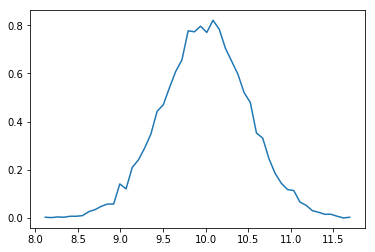

In [74]:
import matplotlib.pyplot as plt
mu = 10
sigma = 0.5 
v = np.random.normal(mu, sigma, 10000)
n, bins = np.histogram(v, bins=50, normed=True)
plt.plot(.5*(bins[1:]+bins[:-1]), n)
plt.show()


## 随堂小项目

### 七月在线python数据分析集训营 julyedu.com

用numpy写一个softmax

[什么是softmax?](http://cs231n.github.io/linear-classify/#softmax)

In [21]:
import numpy as np
m = np.random.rand(10, 10) * 10 + 1000
print(m)

[[ 1005.6268522   1006.37640425  1009.16607654  1006.60560186
   1004.10292284  1005.5612714   1009.10305278  1000.07293013  1007.4625404
   1000.44251085]
 [ 1006.85008953  1005.50904204  1002.31367115  1005.7564141   1000.25971641
   1006.00979083  1007.12821065  1007.23651786  1002.37159662
   1005.04012624]
 [ 1002.63382438  1004.40074103  1002.75870734  1000.20725862
   1003.31057929  1005.30945933  1004.85378369  1006.1602791   1007.31576326
   1000.38095496]
 [ 1009.3515505   1000.79475559  1000.83100563  1002.2717183   1009.43042959
   1001.8705134   1002.93765709  1001.44900852  1007.20534627  1001.5160502 ]
 [ 1007.56624747  1001.91174089  1007.52248698  1003.55344569
   1002.82665149  1001.9406309   1008.47098145  1005.35970666
   1006.55433931  1005.82345413]
 [ 1003.47411311  1004.46967672  1002.0741481   1001.69349575
   1007.57488751  1005.97223924  1002.10361482  1005.4440204   1007.1158348
   1006.01226291]
 [ 1008.23895842  1005.47496358  1001.13920659  1008.34770996


In [22]:
print(np.exp(m))

[[ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]]


c:\users\jasonchuzewei\anaconda3\envs\julyedu\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [23]:
m_row_max = m.max(axis=1)
print(m_row_max, m_row_max.shape)

[ 1009.16607654  1007.23651786  1007.31576326  1009.43042959  1008.47098145
  1007.57488751  1009.55611818  1009.5571187   1009.12880593  1009.84092066] (10,)


In [24]:
m = m - m_row_max
print(m)

[[-3.53922434 -0.8601136   1.85031327 -2.82482773 -4.36805861 -2.01361612
  -0.4530654  -9.48418857 -1.66626552 -9.39840982]
 [-2.31598701 -1.72747581 -5.00209211 -3.67401548 -8.21126504 -1.56509668
  -2.42790753 -2.32060085 -6.7572093  -4.80079442]
 [-6.53225216 -2.83577683 -4.55705593 -9.22317097 -5.16040216 -2.26542819
  -4.70233449 -3.39683961 -1.81304266 -9.4599657 ]
 [ 0.18547396 -6.44176227 -6.48475764 -7.15871129  0.95944814 -5.70437412
  -6.6184611  -8.10811019 -1.92345965 -8.32487046]
 [-1.59982907 -5.32477697  0.20672372 -5.8769839  -5.64432996 -5.63425661
  -1.08513673 -4.19741205 -2.57446661 -4.01746653]
 [-5.69196343 -2.76684114 -5.24161517 -7.73693384 -0.89609394 -1.60264828
  -7.45250336 -4.1130983  -2.01297113 -3.82865775]
 [-0.92711812 -1.76155428 -6.17655667 -1.08271963 -1.47336683 -5.31553471
  -3.41802511 -3.49323654  0.42731225 -4.40571425]
 [-4.41036853 -2.14072466  2.24135544 -1.92696723 -3.05647927 -1.70396531
  -6.88933413 -1.09957318 -4.91078566 -1.15281131]


In [32]:
m_exp = np.exp(m)
print(m_exp, m_exp.shape)

[[  2.90358404e-02   4.23114012e-01   6.36181220e+00   5.93188748e-02
    1.26758254e-02   1.33505031e-01   6.35676559e-01   7.60447503e-05
    1.88951384e-01   8.28557167e-05]
 [  9.86687488e-02   1.77732474e-01   6.72386521e-03   2.53743747e-02
    2.71576947e-04   2.09067799e-01   8.82212396e-02   9.82145559e-02
    1.16246875e-03   8.22321179e-03]
 [  1.45572363e-03   5.86729295e-02   1.04929054e-02   9.87251366e-05
    5.73939107e-03   1.03785585e-01   9.07406902e-03   3.34789094e-02
    1.63156949e-01   7.79092635e-05]
 [  1.20378885e+00   1.59359586e-03   1.52653070e-03   7.78056598e-04
    2.61025557e+00   3.33136178e-03   1.33548455e-03   3.01087335e-04
    1.46100629e-01   2.42412325e-04]
 [  2.01931032e-01   4.86943692e-03   1.22964279e+00   2.80322736e-03
    3.53751789e-03   3.57333261e-03   3.37855588e-01   1.50344350e-02
    7.61944530e-02   1.79985059e-02]
 [  3.37296389e-03   6.28602585e-02   5.29170295e-03   4.36407622e-04
    4.08160852e-01   2.01362548e-01   5.79987

In [35]:
m_exp_row_sum = m_exp.sum(axis = 1).reshape(10,1)
print(m_exp_row_sum, m_exp_row_sum.shape)

[[  7.84424863]
 [  0.71366032]
 [  0.3860331 ]
 [  3.96925358]
 [  1.89344032]
 [  0.85375168]
 [  2.75080628]
 [ 10.56754136]
 [  1.49756826]
 [ 17.44762591]] (10, 1)


In [36]:
m_softmax = m_exp / m_exp_row_sum
print(m_softmax)

[[  3.70154514e-03   5.39393933e-02   8.11016135e-01   7.56208500e-03
    1.61593877e-03   1.70194798e-02   8.10372783e-02   9.69433198e-06
    2.40878882e-02   1.05626072e-05]
 [  1.38257301e-01   2.49043516e-01   9.42166051e-03   3.55552553e-02
    3.80540912e-04   2.92951415e-01   1.23617970e-01   1.37620873e-01
    1.62888243e-03   1.15225852e-02]
 [  3.77098141e-03   1.51989376e-01   2.71813621e-02   2.55742674e-04
    1.48676140e-02   2.68851521e-01   2.35059353e-02   8.67254898e-02
    4.22650157e-01   2.01820165e-04]
 [  3.03278394e-01   4.01485022e-04   3.84588857e-04   1.96020885e-04
    6.57618748e-01   8.39291749e-04   3.36457352e-04   7.58549005e-05
    3.68080865e-02   6.10725217e-05]
 [  1.06647688e-01   2.57174037e-03   6.49422524e-01   1.48049417e-03
    1.86830176e-03   1.88721692e-03   1.78434770e-01   7.94027400e-03
    4.02412752e-02   9.50571596e-03]
 [  3.95075520e-03   7.36282691e-02   6.19817573e-03   5.11164584e-04
    4.78079120e-01   2.35856107e-01   6.79340

In [37]:
print(m_softmax.sum(axis=1))

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


更多的numpy细节和用法可以查看一下官网[numpy指南](http://docs.scipy.org/doc/numpy/reference/)